In [15]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict
if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [16]:
env = BlackjackEnv()

In [17]:
np.zeros(env.action_space.n)

array([ 0.,  0.])

In [18]:
def make_epsilon_greedy_policy(Q, epsilon, nA):
    """
    Creates an epsilon-greedy policy based on a given Q-function and epsilon.
    
    Args:
        Q: A dictionary that maps from state -> action-values.
            Each value is a numpy array of length nA (see below)
        epsilon: The probability to select a random action . float between 0 and 1.
        nA: Number of actions in the environment.
    
    Returns:
        A function that takes the observation as an argument and returns
        the probabilities for each action in the form of a numpy array of length nA.
    
    """
    def policy_fn(observation):
        A = np.ones(nA, dtype=float) * epsilon / nA
        best_action = np.argmax(Q[observation])
        A[best_action] += (1.0 - epsilon)
        return A
    return policy_fn

In [9]:
def mc_control_epsilon_greedy(env, num_episodes, discount_factor=1.0, epsilon=0.1):
    """
    Monte Carlo Control using Epsilon-Greedy policies.
    Finds an optimal epsilon-greedy policy.
    
    Args:
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
        epsilon: Chance the sample a random action. Float betwen 0 and 1.
    
    Returns:
        A tuple (Q, policy).
        Q is a dictionary mapping state -> action values.
        policy is a function that takes an observation as an argument and returns
        action probabilities
    """
    
    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final action-value function.
    # A nested dictionary that maps state -> (action -> action-value).
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    # The policy we're following
    policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)
    
    for i_episode in range(1, num_episodes + 1):
        # Print out which episode we're on, useful for debugging.
        if i_episode % 1000 == 0:
            print("\rEpisode {}/{}.".format(i_episode, num_episodes), end="")
            sys.stdout.flush()

        # Generate an episode.
        # An episode is an array of (state, action, reward) tuples
        episode = []
        state = env.reset()
        for t in range(100):
            probs = policy(state)
            action = np.random.choice(np.arange(len(probs)), p=probs)
            next_state, reward, done, _ = env.step(action)
            episode.append((state, action, reward))
            if done:
                break
            state = next_state

        # Find all (state, action) pairs we've visited in this episode
        # We convert each state to a tuple so that we can use it as a dict key
        sa_in_episode = set([(tuple(x[0]), x[1]) for x in episode])
        for state, action in sa_in_episode:
            sa_pair = (state, action)
            # Find the first occurance of the (state, action) pair in the episode
            first_occurence_idx = next(i for i,x in enumerate(episode)
                                       if x[0] == state and x[1] == action)
            # Sum up all rewards since the first occurance
            G = sum([x[2]*(discount_factor**i) for i,x in enumerate(episode[first_occurence_idx:])])
            # Calculate average return for this state over all sampled episodes
            returns_sum[sa_pair] += G
            returns_count[sa_pair] += 1.0
            Q[state][action] = returns_sum[sa_pair] / returns_count[sa_pair]
        
        # The policy is improved implicitly by changing the Q dictionar
    
    return Q, policy

In [10]:
Q, policy = mc_control_epsilon_greedy(env, num_episodes=500000, epsilon=0.1)

Episode 500000/500000.

In [14]:
print('t')

t


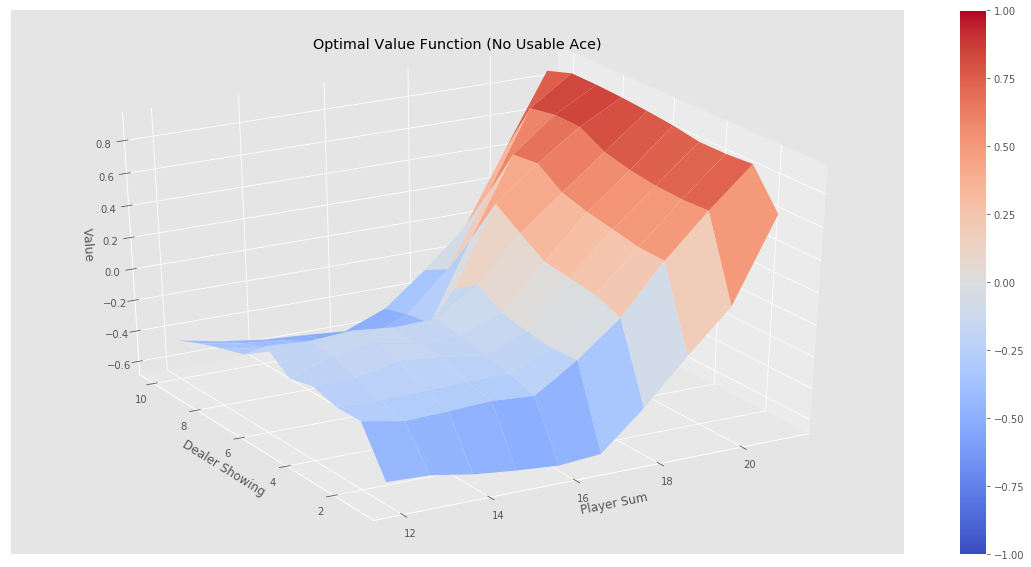

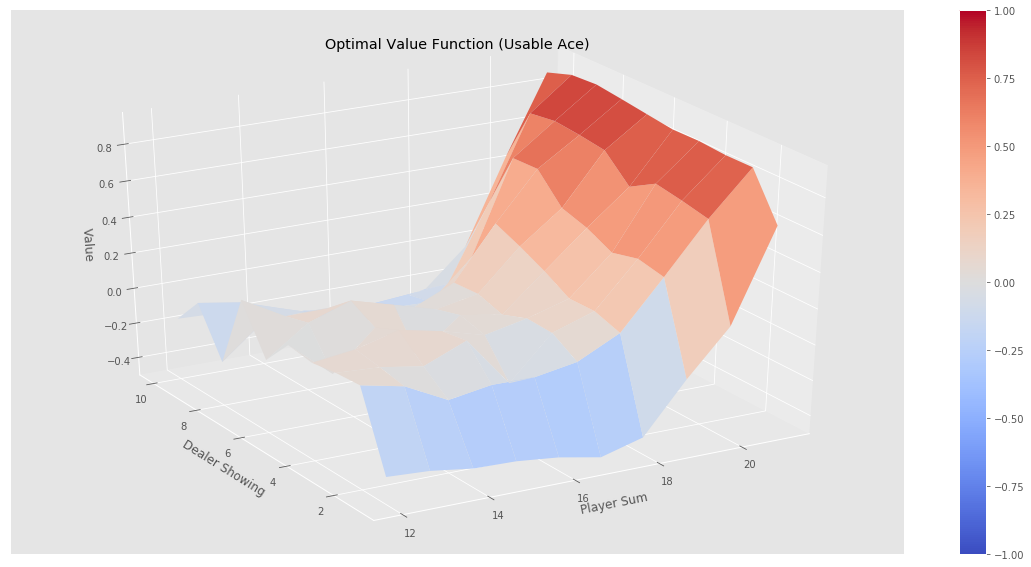

In [11]:
# For plotting: Create value function from action-value function
# by picking the best action at each state
V = defaultdict(float)
for state, actions in Q.items():
    action_value = np.max(actions)
    V[state] = action_value
plotting.plot_value_function(V, title="Optimal Value Function")

In [37]:
def mc_control_epsilon_greedy_breakdown(env, num_episodes, discount_factor=1.0, epsilon=0.1):
    """
    Monte Carlo Control using Epsilon-Greedy policies.
    Finds an optimal epsilon-greedy policy.
    
    Args:
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
        epsilon: Chance the sample a random action. Float betwen 0 and 1.
    
    Returns:
        A tuple (Q, policy).
        Q is a dictionary mapping state -> action values.
        policy is a function that takes an observation as an argument and returns
        action probabilities
    """
    
    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final action-value function.
    # A nested dictionary that maps state -> (action -> action-value).
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    print('Q:',Q)
    print("------------------------------")
    print("------------------------------")
    
    # The policy we're following
    policy = make_epsilon_greedy_policy_breakdown(Q, epsilon, env.action_space.n)
    
    for i_episode in range(1, num_episodes + 1):
        # Print out which episode we're on, useful for debugging.
        if i_episode % 1000 == 0:
            print("\rEpisode {}/{}.".format(i_episode, num_episodes), end="")
            sys.stdout.flush()

        # Generate an episode.
        # An episode is an array of (state, action, reward) tuples
        episode = []
        state = env.reset()
        print('state:',state)
        for t in range(100):
            probs = policy(state)
            action = np.random.choice(np.arange(len(probs)), p=probs)
            print('t:',t,'probs:',probs,'action:',action)
            next_state, reward, done, _ = env.step(action)
            episode.append((state, action, reward))
            print('episode:',episode,'next_state:',next_state)
            if done:
                break
            state = next_state
        print("------------------------------")
        print("------------------------------")
        # Find all (state, action) pairs we've visited in this episode
        # We convert each state to a tuple so that we can use it as a dict key
        sa_in_episode = set([(tuple(x[0]), x[1]) for x in episode])
        print('sa_in_episode:',sa_in_episode)
        for state, action in sa_in_episode:
            sa_pair = (state, action)
            # Find the first occurance of the (state, action) pair in the episode
            first_occurence_idx = next(i for i,x in enumerate(episode)
                                       if x[0] == state and x[1] == action)
            print('looping through sa_pair',sa_pair, 'first_occurence_idx',first_occurence_idx)
            # Sum up all rewards since the first occurance
            G = sum([x[2]*(discount_factor**i) for i,x in enumerate(episode[first_occurence_idx:])])
            # Calculate average return for this state over all sampled episodes
            print('looping through sa_pair',sa_pair, 'episode[first_occurence_idx:]',episode[first_occurence_idx:])
            print('looping through sa_pair',sa_pair, 'G',G)
            returns_sum[sa_pair] += G
            returns_count[sa_pair] += 1.0
            Q[state][action] = returns_sum[sa_pair] / returns_count[sa_pair]
            print('returns_sum[state]',returns_sum[sa_pair],'returns_count[state]',returns_count[sa_pair],'Q[state][action]',Q[state][action],'Q:',Q)
        
        # The policy is improved implicitly by changing the Q dictionar
    
    return Q, policy

In [34]:
def make_epsilon_greedy_policy_breakdown(Q, epsilon, nA):
    """
    Creates an epsilon-greedy policy based on a given Q-function and epsilon.
    
    Args:
        Q: A dictionary that maps from state -> action-values.
            Each value is a numpy array of length nA (see below)
        epsilon: The probability to select a random action . float between 0 and 1.
        nA: Number of actions in the environment.
    
    Returns:
        A function that takes the observation as an argument and returns
        the probabilities for each action in the form of a numpy array of length nA.
    
    """
    def policy_fn(observation):
        A = np.ones(nA, dtype=float) * epsilon / nA
        print('**************************')
        best_action = np.argmax(Q[observation])
        A[best_action] += (1.0 - epsilon)
        print('Q:',Q, 'Q[observation]:',observation,Q[observation])
        print('best_action:',best_action, '--A:',A)
        print('**************************')
        return A
    return policy_fn

In [24]:
Q = defaultdict(lambda: np.zeros(env.action_space.n))
print('Q:',Q,'env.action_space.n:',env.action_space.n)
policy = make_epsilon_greedy_policy_breakdown(Q, 0.1, env.action_space.n)
state=env.reset()
print('state:',state)
policy(state)


Q: defaultdict(<function <lambda> at 0x000000000AB4EE18>, {}) env.action_space.n: 2
state: (15, 6, False)
**************************
A1: [ 0.05  0.05]
Q: defaultdict(<function <lambda> at 0x000000000AB4EE18>, {(15, 6, False): array([ 0.,  0.])}) Q[observation]: (15, 6, False) [ 0.  0.]
best_action: 0 A: [ 0.95  0.05]


array([ 0.95,  0.05])

In [38]:
mc_control_epsilon_greedy_breakdown(env, num_episodes=1, epsilon=0.1)

Q: defaultdict(<function mc_control_epsilon_greedy_breakdown.<locals>.<lambda> at 0x000000000AB27400>, {})
------------------------------
------------------------------
state: (17, 1, False)
**************************
Q: defaultdict(<function mc_control_epsilon_greedy_breakdown.<locals>.<lambda> at 0x000000000AB27400>, {(17, 1, False): array([ 0.,  0.])}) Q[observation]: (17, 1, False) [ 0.  0.]
best_action: 0 --A: [ 0.95  0.05]
**************************
t: 0 probs: [ 0.95  0.05] action: 1
episode: [((17, 1, False), 1, -1)] next_state: (26, 1, False)
------------------------------
------------------------------
sa_in_episode: {((17, 1, False), 1)}
looping through sa_pair ((17, 1, False), 1) first_occurence_idx 0
looping through sa_pair ((17, 1, False), 1) episode[first_occurence_idx:] [((17, 1, False), 1, -1)]
looping through sa_pair ((17, 1, False), 1) G -1.0
returns_sum[state] -1.0 returns_count[state] 1.0 Q[state][action] -1.0 Q: defaultdict(<function mc_control_epsilon_greedy_brea

(defaultdict(<function __main__.mc_control_epsilon_greedy_breakdown.<locals>.<lambda>>,
             {(17, 1, False): array([ 0., -1.])}),
 <function __main__.make_epsilon_greedy_policy_breakdown.<locals>.policy_fn>)

In [31]:
Q_test

defaultdict(<function __main__.mc_control_epsilon_greedy.<locals>.<lambda>>,
            {(12, 1, False): array([-0.77682403, -0.56312292]),
             (12, 1, True): array([-0.88235294, -0.30801688]),
             (12, 2, False): array([-0.27624174, -0.30847458]),
             (12, 2, True): array([ 0.        ,  0.04188482]),
             (12, 3, False): array([-0.24439584, -0.24894515]),
             (12, 3, True): array([ 0.        ,  0.11442786]),
             (12, 4, False): array([-0.20181949, -0.25471698]),
             (12, 4, True): array([-0.375     ,  0.14285714]),
             (12, 5, False): array([-0.15849714, -0.25      ]),
             (12, 5, True): array([-0.17647059,  0.14090909]),
             (12, 6, False): array([-0.15922444, -0.22908745]),
             (12, 6, True): array([-0.55555556,  0.18565401]),
             (12, 7, False): array([-0.6       , -0.24202447]),
             (12, 7, True): array([-0.5       ,  0.13989637]),
             (12, 8, False): array